### Bluuring advantages :

 We apply Canny edge detection which highlights the edges of objects in the image. This helps us find boundaries of shapes and objects easily.

(222, 227, 3)


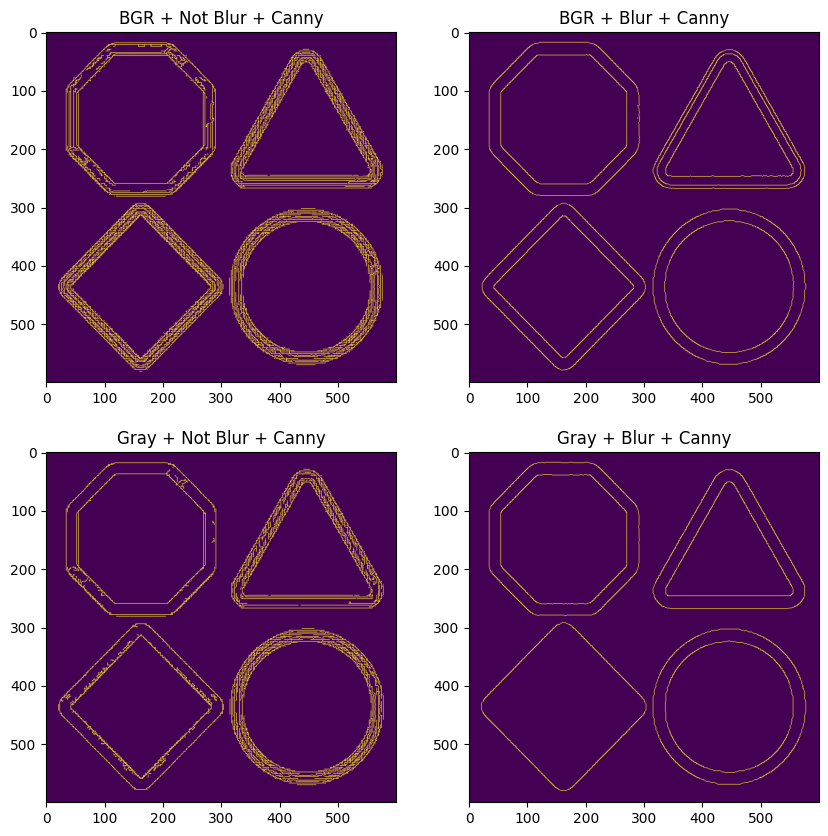

In [8]:
import cv2 
import matplotlib.pyplot as plt
img = cv2.imread("../images/shapes.png")
print(img.shape)
width , height = 600 , 600

## Gray Or Not 
img =cv2.resize(img,(width,height),interpolation=cv2.INTER_AREA) # Not Gray 
imgGray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # Gray 

# Blur Or Not 
imgGrayBlur =cv2.GaussianBlur(imgGray,(7,7),5) # Gray + Blur
imgBlur = cv2.GaussianBlur(img,(7,7),6) #BGR + Blur

# Canny 
imgCanny = cv2.Canny(img,100,200) # BGR + Not Blur + Canny 
imgCannyBluured = cv2.Canny(imgBlur,100,200) # BGR + Blur + Canny
imgCannyGray = cv2.Canny(imgGray,100,200) # Gray + Not Blur + Canny
imgCannyGrayBlurred = cv2.Canny(imgGrayBlur,100,200) # Gray + Blur + Canny

fig ,axes = plt.subplots(2,2,figsize=(10,10))
axes[0,0].imshow((imgCanny)),axes[0,0].title.set_text("BGR + Not Blur + Canny")
axes[0,1].imshow(imgCannyBluured), axes[0,1].title.set_text("BGR + Blur + Canny")
axes[1,0].imshow(imgCannyGray), axes[1,0].title.set_text("Gray + Not Blur + Canny")
axes[1,1].imshow(imgCannyGrayBlurred) ,axes[1,1].title.set_text("Gray + Blur + Canny")

plt.show()


In [2]:
contours, hierarchy = cv2.findContours(imgCannyGrayBlurred,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print(contours[0].shape)
print(contours[1].shape)
print(contours[2].shape)
print(contours[3].shape)
print(f"The Number Of Contours : {len(contours)}")
print(f"Contou Erea : {cv2.contourArea(contours[3])}")

(756, 1, 2)
(695, 1, 2)
(736, 1, 2)
(769, 1, 2)
The Number Of Contours : 4
Contou Erea : 55450.5


Draw a contour on a copy 

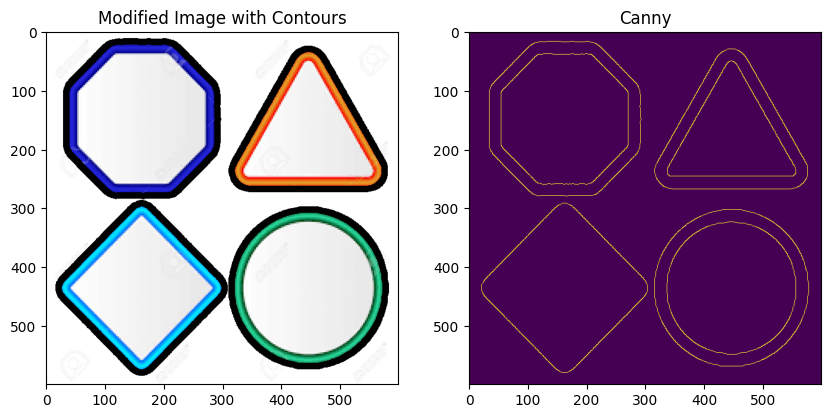

In [11]:
Image_BGR = img.copy() # BGR image
cv2.drawContours(Image_BGR,contours,-1,(0,0,0),10)

fig,axes = plt.subplots(1,2,figsize=(10,10))
axes[0].imshow(Image_BGR) ,axes[0].title.set_text("Modified Image with Contours")
axes[1].imshow(imgCannyGrayBlurred) , axes[1].title.set_text("Canny")

plt.show()

#cv2.imshow("Modified Image with Contours", copyImage)
#cv2.imshow("Canny", imgCannyGrayBlurred)
#cv2.waitKey(0)

### Detect Rectangle 

In [17]:
def get_contours(img):
    img = img.copy()
    contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours :
        area = cv2.contourArea(cnt)
        if area > 1000:
            print(f"area : {area} ")
            cv2.drawContours(Image_BGR, [cnt], -1, (0, 0, 255), 8)
            perimetre = cv2.arcLength(cnt, True)
            print(f"Perimetre : {perimetre}")
            # Detet The corner Points 
            approx= cv2.approxPolyDP(cnt,0.012*perimetre,True)
            print(f"approx : {len(approx)}")
            x,y,w,h = cv2.boundingRect(cnt)
            if len(approx) == 3 :
                objColor = "Traingle"
            elif len(approx) == 4 :
                objColor = "Rectangle"
            else :
                objColor = "None"    
            cv2.rectangle(Image_BGR,(x,y),(x+w,y+h),(0,255,0),5) 
            cv2.putText(Image_BGR, objColor,(x+w//2-10,y+h//2),cv2.FONT_HERSHEY_COMPLEX,0.7,(0,0,0),2)


area : 54795.0 
Perimetre : 880.2640614509583
approx : 9
area : 45537.5 
Perimetre : 879.3250244855881
approx : 4
area : 38901.0 
Perimetre : 843.6955199241638
approx : 7
area : 55450.5 
Perimetre : 889.5361396074295
approx : 8


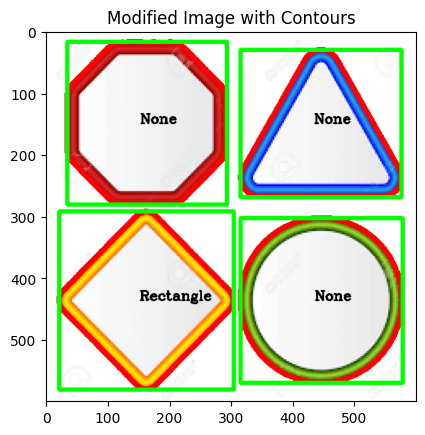

-1

In [ ]:
Image_BGR = img.copy() # BGR image that will be modified

get_contours(imgCannyGrayBlurred) 

# Displaying Image with matplotlib
plt.imshow(cv2.cvtColor(Image_BGR,cv2.COLOR_BGR2RGB)) 
plt.title("Modified Image with Contours")

plt.show()


#cv2.imshow("Modified Image with Contours", Image_BGR)
#cv2.waitKey(0)

<function title at 0x00000161122CDC60>
